**Deutsch-Jozsa Algorithm - Query (promise) problem**

Deutsch-Jozsa Circuit (constant oracle):


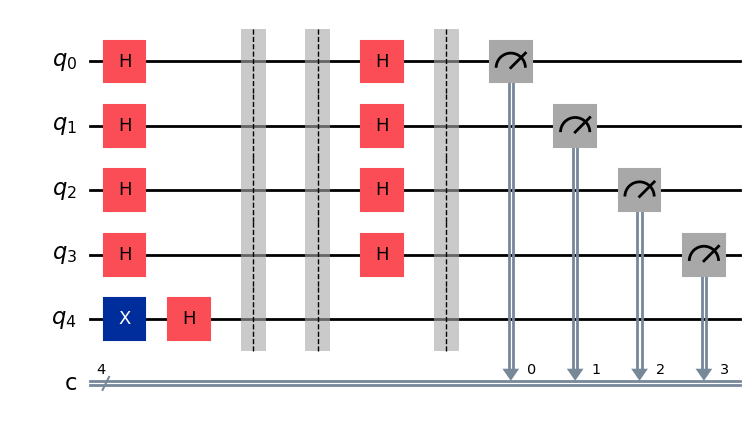


Measurement Results:


Text(0, 0.5, 'Counts')

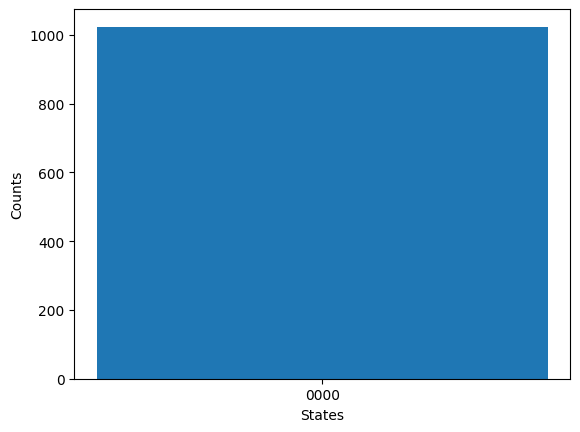

In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

def deutsch_jozsa_oracle(n, oracle_type='balanced'):
    """
    Returns a Deutsch-Jozsa oracle as a QuantumCircuit.
    n: number of input qubits (not counting the output qubit)
    oracle_type: 'balanced' or 'constant'
    """
    qc = QuantumCircuit(n+1)
    if oracle_type == 'constant':
        # Constant oracle: do nothing (always 0), or flip output (always 1)
        # Here, we do nothing (f(x)=0)
        pass
    elif oracle_type == 'balanced':
        # Balanced oracle: flip output for half the inputs
        # Example: flip output if first input qubit is 1
        qc.cx(0, n)
    else:
        raise ValueError("oracle_type must be 'balanced' or 'constant'")
    qc.barrier()
    return qc

def deutsch_jozsa_circuit(n, oracle_type='balanced'):
    qc = QuantumCircuit(n+1, n)
    # Initialize output qubit to |1>
    qc.x(n)
    # Hadamard on all qubits
    for q in range(n+1):
        qc.h(q)
    qc.barrier()
    # Oracle
    qc.compose(deutsch_jozsa_oracle(n, oracle_type), inplace=True)
    # Hadamard on input qubits
    for q in range(n):
        qc.h(q)
    qc.barrier()
    # Measure input qubits
    qc.measure(range(n), range(n))
    return qc

# Parameters
n = 4  # Number of input qubits

# Choose oracle type: 'balanced' or 'constant'
oracle_type = 'constant'  # Try 'constant' as well

# Build and display circuit
dj_circuit = deutsch_jozsa_circuit(n, oracle_type)
print(f"Deutsch-Jozsa Circuit ({oracle_type} oracle):")
display(dj_circuit.draw('mpl', fold=-1))

# Simulate
simulator = AerSimulator()
compiled = transpile(dj_circuit, simulator)
job = simulator.run(compiled, shots=1024)
counts = job.result().get_counts()

# Plot results
print("\nMeasurement Results:")
plot_histogram(counts)

plt.bar(counts.keys(), counts.values())
plt.xlabel('States')
plt.ylabel('Counts')
